In [1]:
# Imports & Initial Setup

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
data = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')

In [4]:
# Basic Cleaning
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

0 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: ['Transaction ID', 'Customer ID', 'Transaction Date', 'Payment Method', 'Product Category', 'Customer Location', 'Device Used', 'IP Address', 'Shipping Address', 'Billing Address'] 



,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,24-03-2024 23:42,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,22-01-2024 00:53,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,22-01-2024 08:06,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,16-01-2024 20:34,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,16-01-2024 15:47,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [5]:
data.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [5]:
# Drop rows with missing values and remove duplicates
drop_columns = [ # this list includes all spellings across CIC NIDS datasets
    'Transaction ID', 'Customer ID','Transaction Date','Customer Location','IP Address',
       'Shipping Address', 'Billing Address',
]
data.drop(columns=drop_columns, inplace=True, errors='ignore')  

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction Amount  23634 non-null  float64
 1   Payment Method      23634 non-null  object 
 2   Product Category    23634 non-null  object 
 3   Quantity            23634 non-null  int64  
 4   Customer Age        23634 non-null  int64  
 5   Device Used         23634 non-null  object 
 6   Is Fraudulent       23634 non-null  int64  
 7   Account Age Days    23634 non-null  int64  
 8   Transaction Hour    23634 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 1.6+ MB


In [8]:
data['Is Fraudulent'].value_counts()

0    22412
1     1222
Name: Is Fraudulent, dtype: int64

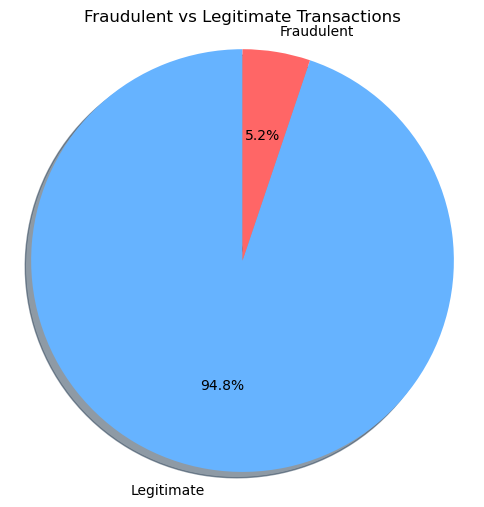

In [9]:
fraud_counts = data['Is Fraudulent'].value_counts()
labels = ['Legitimate', 'Fraudulent']
colors = ['#66b3ff', '#ff6666']

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title('Fraudulent vs Legitimate Transactions')
plt.axis('equal')
plt.show()

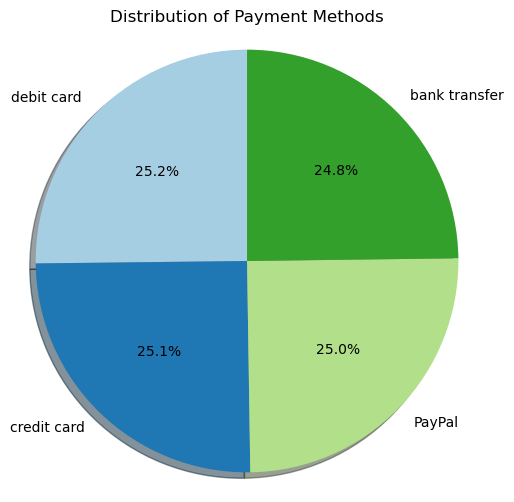

In [10]:
#sns.countplot(x='Payment Method',data=data, palette='hls')
#plt.show()
payment_counts = data['Payment Method'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, shadow=True)
plt.title('Distribution of Payment Methods')
plt.axis('equal')
plt.show()

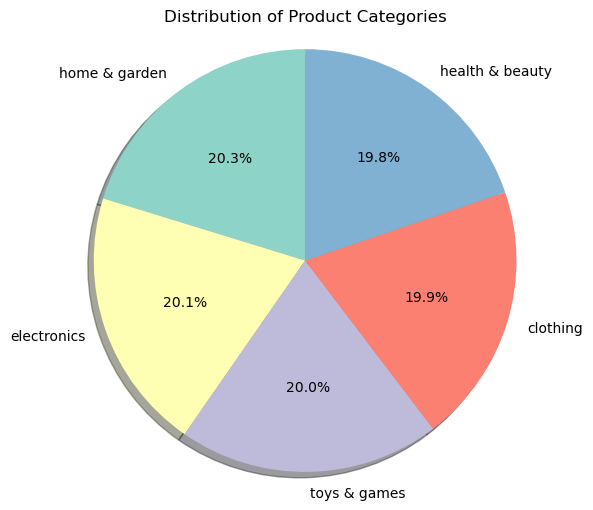

In [11]:
#sns.countplot(x='Product Category',data=data, palette='hls')
#plt.show()
product_counts = data['Product Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors, shadow=True)
plt.title('Distribution of Product Categories')
plt.axis('equal')
plt.show()

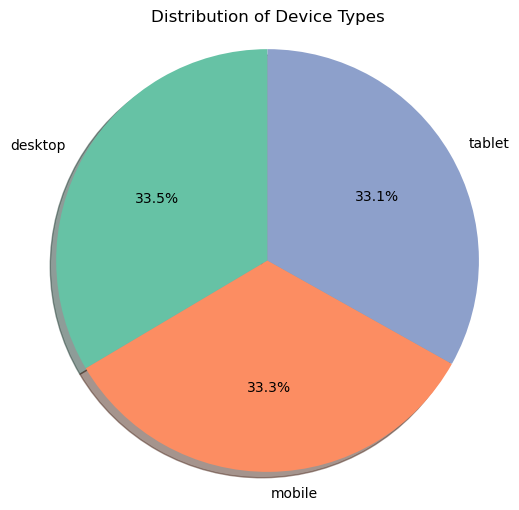

In [12]:
#sns.countplot(x='Device Used',data=data, palette='hls')
#plt.show()
device_counts = data['Device Used'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors, shadow=True)
plt.title('Distribution of Device Types')
plt.axis('equal')
plt.show()

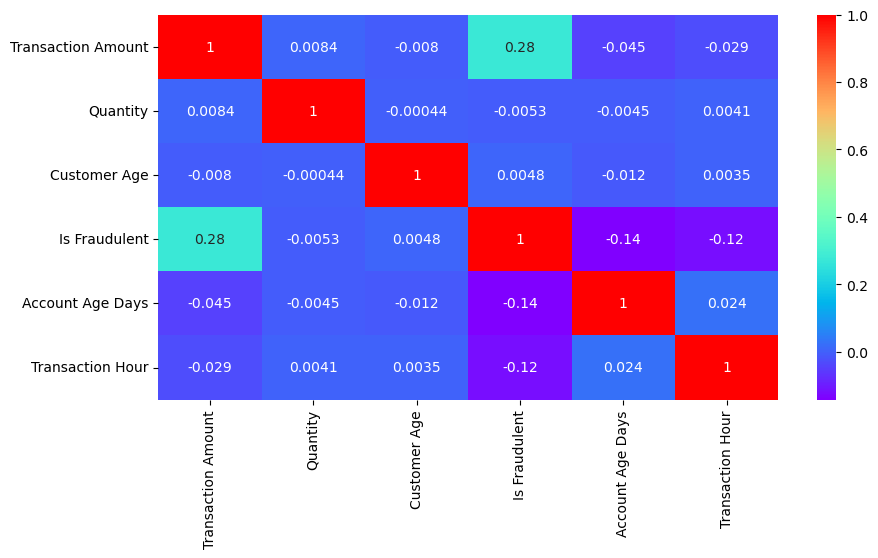

In [13]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [14]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Product Category']= label_encoder.fit_transform(data['Product Category'])
data['Payment Method']= label_encoder.fit_transform(data['Payment Method'])
data['Device Used']= label_encoder.fit_transform(data['Device Used'])

In [15]:
X = data.drop(["Is Fraudulent"],axis =1)
y = data["Is Fraudulent"]

In [16]:
data.to_csv('processed.csv')

In [17]:
data.columns

Index(['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Device Used', 'Is Fraudulent', 'Account Age Days',
       'Transaction Hour'],
      dtype='object')

In [18]:
X = data[['Transaction Amount', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Device Used','Account Age Days',
       'Transaction Hour']]
y = data['Is Fraudulent']

# SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_oversampled, y_oversampled = sm.fit_resample(X, y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.20, random_state = 42)
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [21]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [22]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# LogisticRegression

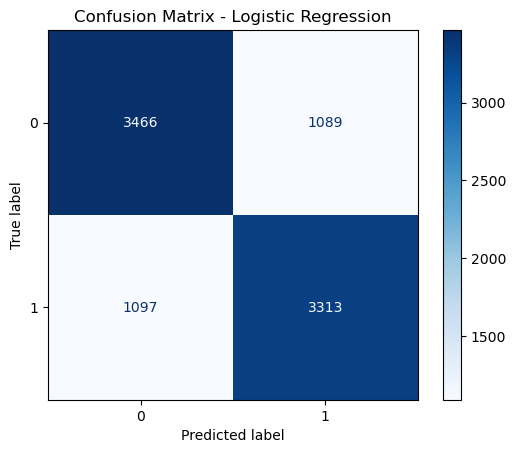

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lr = LogisticRegression(multi_class='ovr', solver='liblinear', C=1.0)
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [24]:
storeResults('Logistic Regression',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

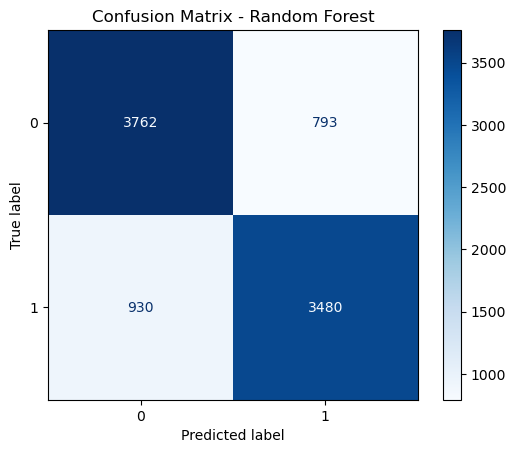

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=4,n_estimators=200,min_samples_split=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [26]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

# Decision Tree

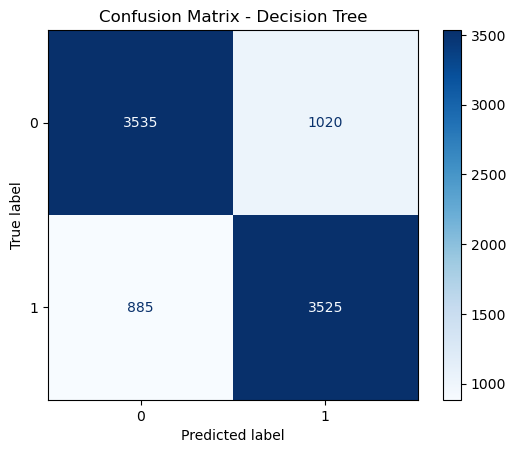

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5,min_samples_split=2)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [28]:
 storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# NaiveBayes

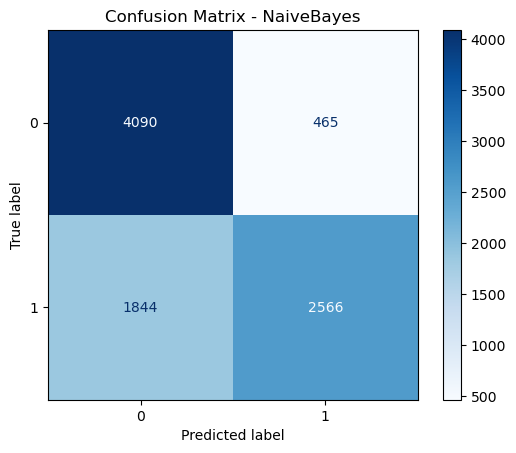

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred    = nb.predict(X_test)

nb_acc = accuracy_score(y_pred, y_test)
nb_prec = precision_score(y_pred, y_test,average='weighted')
nb_rec = recall_score(y_pred, y_test,average='weighted')
nb_f1 = f1_score(y_pred, y_test,average='weighted')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - NaiveBayes')
plt.show()

In [30]:
storeResults('Naive Bayes',nb_acc,nb_prec,nb_rec,nb_f1)

# SVM

In [31]:
from sklearn import svm

In [32]:
svc = svm.SVC(decision_function_shape='ovo',probability=True)
svc.fit(X_train, y_train)

SVC(decision_function_shape='ovo', probability=True)

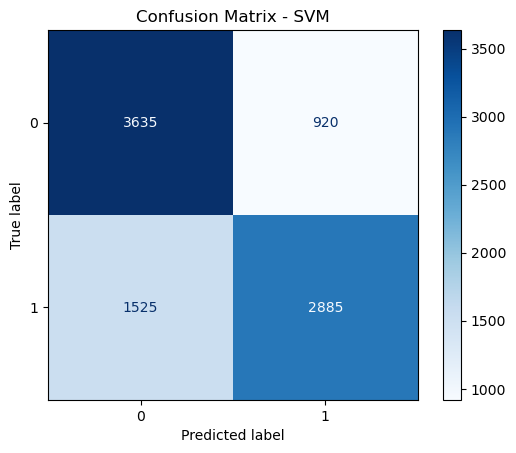

In [33]:
y_pred    = svc.predict(X_test)

svc_acc = accuracy_score(y_pred, y_test)
svc_prec = precision_score(y_pred, y_test,average='weighted')
svc_rec = recall_score(y_pred, y_test,average='weighted')
svc_f1 = f1_score(y_pred, y_test,average='weighted')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.show()

In [34]:
storeResults('SVM',svc_acc,svc_prec,svc_rec,svc_f1)

# KNN

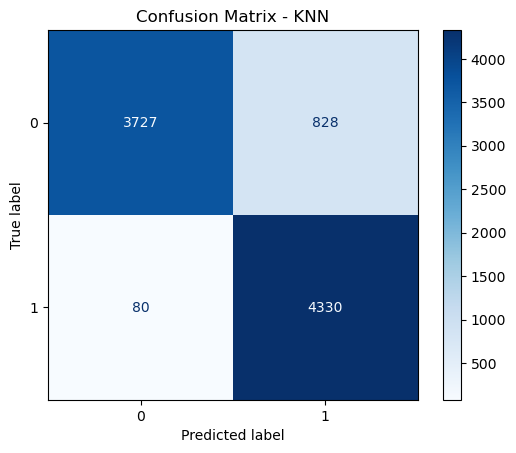

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()

In [36]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# AdaBoost

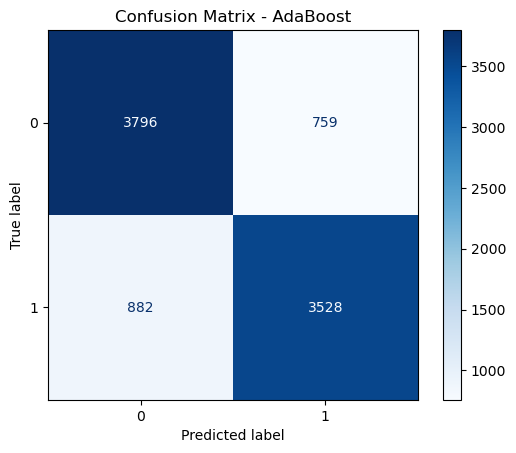

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

ada.fit(X_train, y_train)

y_pred    = ada.predict(X_test)

ada_acc = accuracy_score(y_pred, y_test)
ada_prec = precision_score(y_pred, y_test,average='weighted')
ada_rec = recall_score(y_pred, y_test,average='weighted')
ada_f1 = f1_score(y_pred, y_test,average='weighted')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

In [38]:
storeResults('AdaBoost',ada_acc,ada_prec,ada_rec,ada_f1)

# Extension

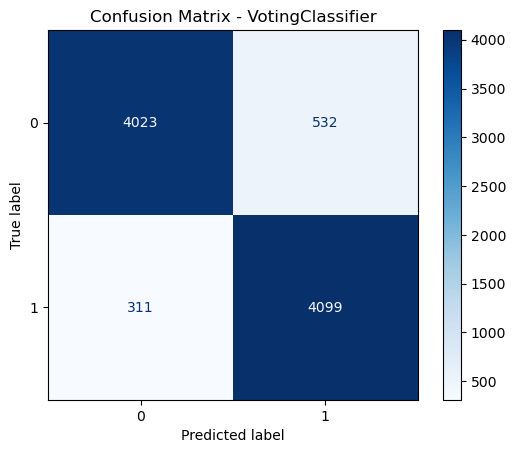

In [39]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, ExtraTreesClassifier

brf = BaggingClassifier(RandomForestClassifier())
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

model = VotingClassifier(estimators= [('BagRF', brf),('BoostDT', bdt)], voting='soft')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - VotingClassifier')
plt.show()

In [40]:
storeResults('Extension',vot_acc,vot_prec,vot_rec,vot_f1)

# Comparison

In [41]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [42]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,Logistic Regression,0.756,0.756,0.756,0.756
1,Random Forest,0.808,0.808,0.808,0.808
2,DecisionTree,0.788,0.788,0.788,0.788
3,Naive Bayes,0.742,0.791,0.742,0.749
4,SVM,0.727,0.737,0.727,0.729
5,KNN,0.899,0.912,0.899,0.899
6,AdaBoost,0.817,0.817,0.817,0.817
7,Extension,0.906,0.907,0.906,0.906


# Modelling

In [43]:
import joblib
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

# Graph

In [44]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

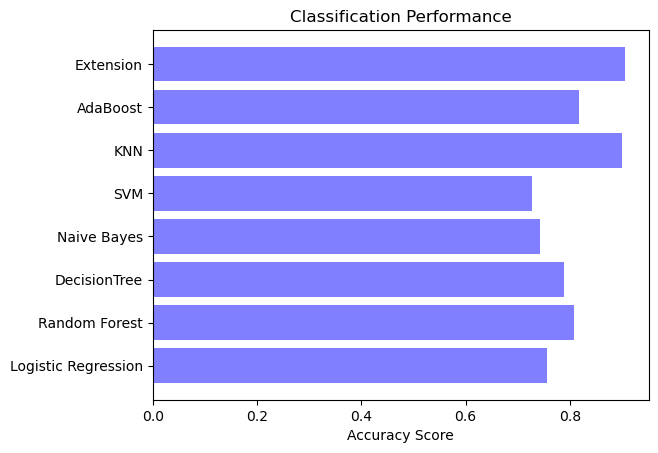

In [45]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

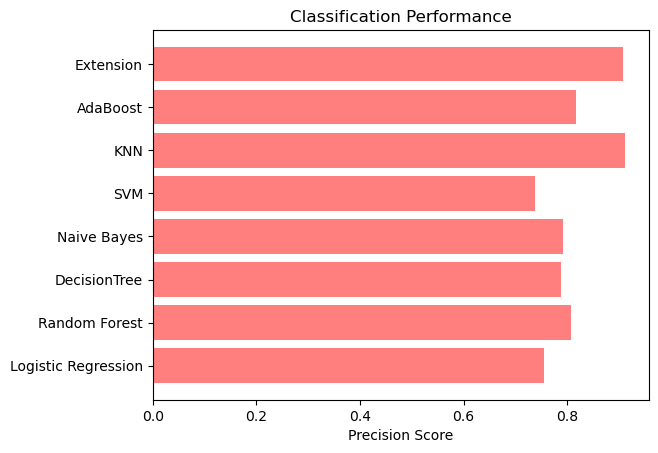

In [46]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

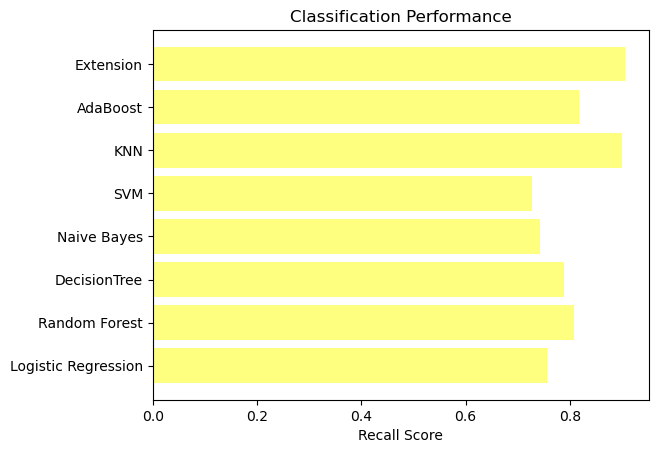

In [47]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

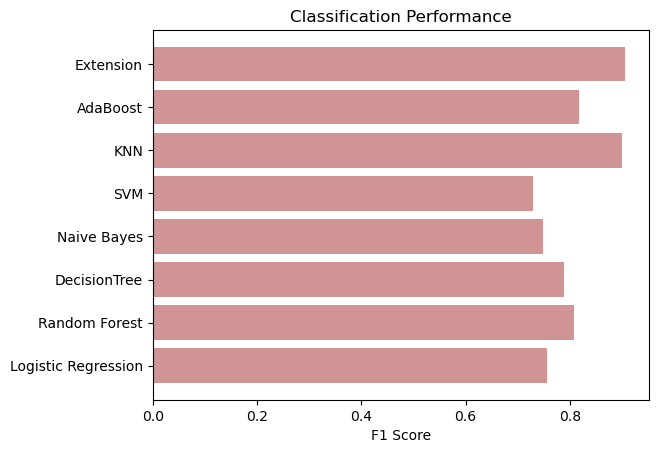

In [48]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='brown')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()